# Mobile phone Business dan Data Understanding

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/mobile.csv")

## 1. Business Understanding

#### Tujuan: Untuk mengidentifikasi fitur-fitur yang memiliki korelasi signifikan dengan range harga dan membangun model SVM (Support Vector Machine) untuk melakukan klasifikasi range harga secara efektif.

## 2. Data Understanding

In [3]:
print("Data Shape:", df.shape)

Data Shape: (2000, 21)


dataset mobile phone ini adalah dataset yang dapat digunakan untuk membuat model klasifikasi range harga berdasarkan pola yang didapatkan dari training. Ukuran dataset mobile sebanyak 2000 data, fitur 20 kolom dan 1 target

In [4]:
df.head(3).T

,0,1,2
battery_power,842.0,1021.0,563.0
blue,0.0,1.0,1.0
clock_speed,2.2,0.5,0.5
dual_sim,0.0,1.0,1.0
fc,1.0,0.0,2.0
four_g,0.0,1.0,1.0
int_memory,7.0,53.0,41.0
m_dep,0.6,0.7,0.9
mobile_wt,188.0,136.0,145.0
n_cores,2.0,3.0,5.0


##### Penjelasan Fitur & Target:

battery_power: Kapasitas baterai dalam mAh dengan tipe data angka (integer)

blue: Support Bluetooth dengan tipe data boolean (0,1)

clock_speed: Clock Speed Microprocessor dengan tipe data float

dual_sim: Support dual sim dengan tipe data boolean (0,1)

fc: Kamera depan dalam mega pixel dengan tipe data angka (integer)

four_g: support 4G dengan tipe data boolean (0,1)

int_memory: penyimpanan internal dalam MB (mega byte) dengan tipe data angka (integer)

m_dep: tebal handphone dalam cm dengan tipe data float

mobile_wt: berat handphone dalam gram dengan tipe data integer

n_cores       : jumlah core processor dengan tipe data angka (integer)

pc            : kamera utama dalam mega pixel dengan tipe data angka (integer)

px_height     : resolusi tinggi pixel handphone dengan tipe data angka (integer)

px_width      : resolusi lebar pixel handphone dengan tipe data angka (integer)

ram           : jumlah ram dalam MB (mega byte) dengan tipe data integer

sc_h          : tinggi layar dengan tipe data angka (integer)

sc_w          : lebar layar dengan tipe data angka (integer)

talk_time     : lama baterai bertahan saat menelepon dengan tipe data angka (integer)

three_g       : support 3G dengan tipe data boolean (0,1)

touch_screen  : Support Touchscreen dengan tipe data boolean (0,1)

wifi          : support wifi dengan dengan tipe data boolean (0,1)

price_range   : range harga 0=sangat murah, 1=murah, 2=sedang dan 3=mahal


In [5]:
print("Columns:\n", df.columns)

Columns:
 Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


## Data Preparation

(-1.1, 1.1, -1.1, 1.1)

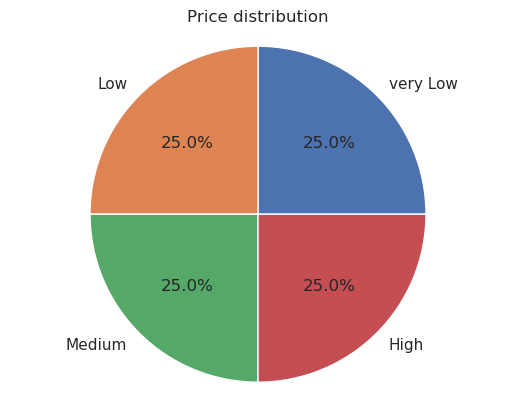

In [7]:
sns.set()
plt.pie(df['price_range'].value_counts(),labels=['very Low','Low','Medium','High'],autopct='%1.1f%%')
plt.title('Price distribution')
plt.axis('equal')

In [8]:
nan_info = df.isnull().sum()
nan_info

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: >

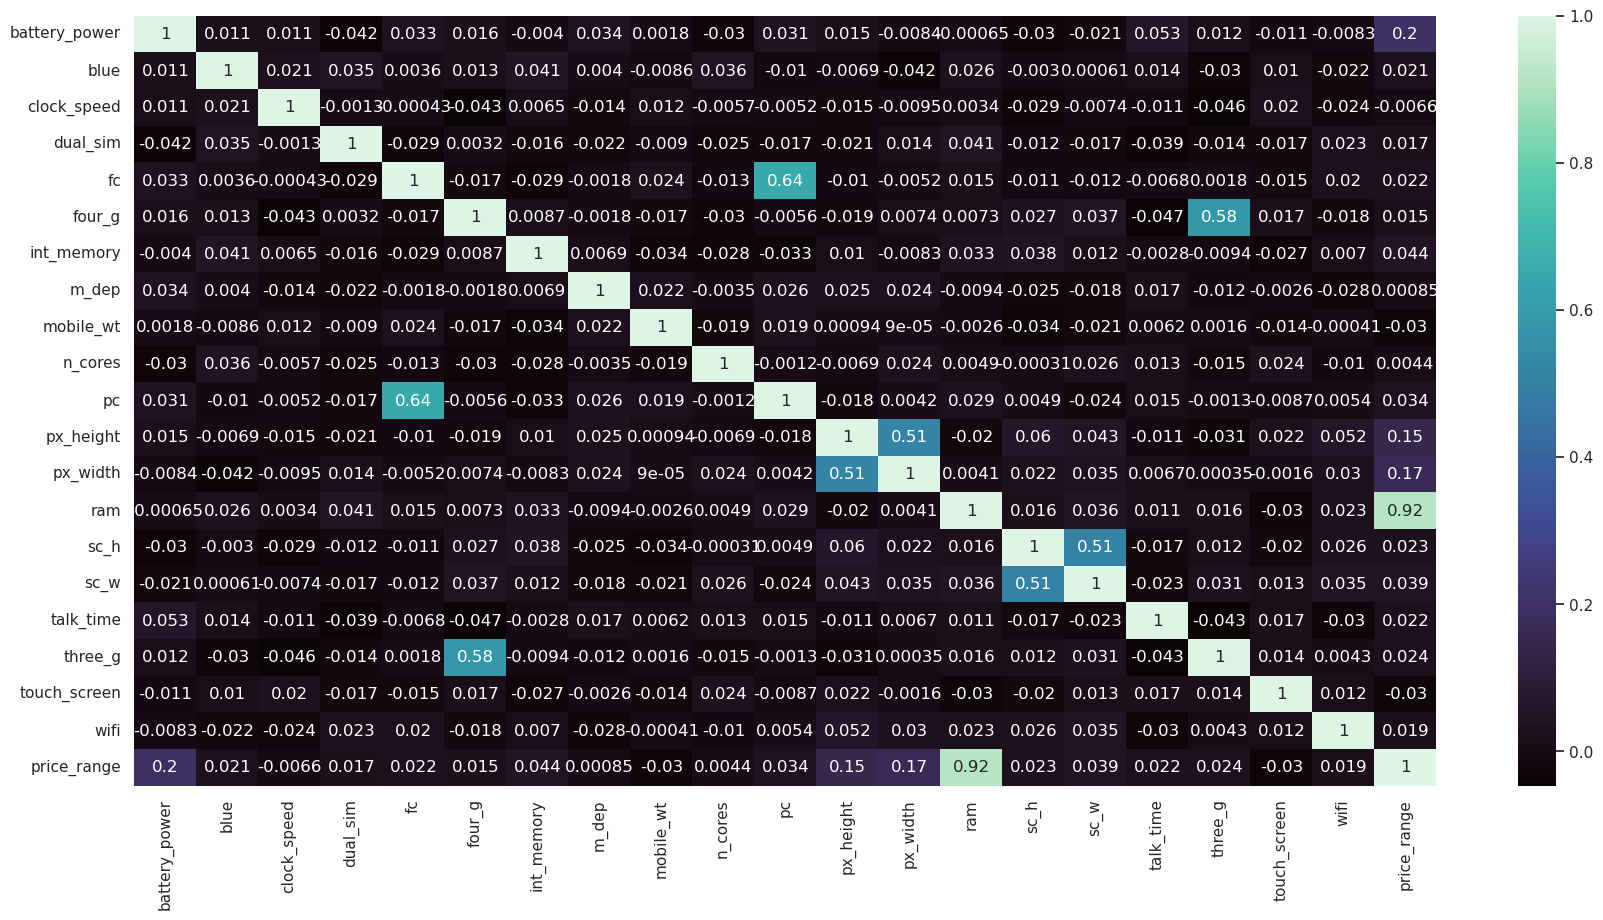

In [9]:
plt.figure(figsize=(21, 10))
sns.heatmap(df.corr(), annot=True,cmap='mako')

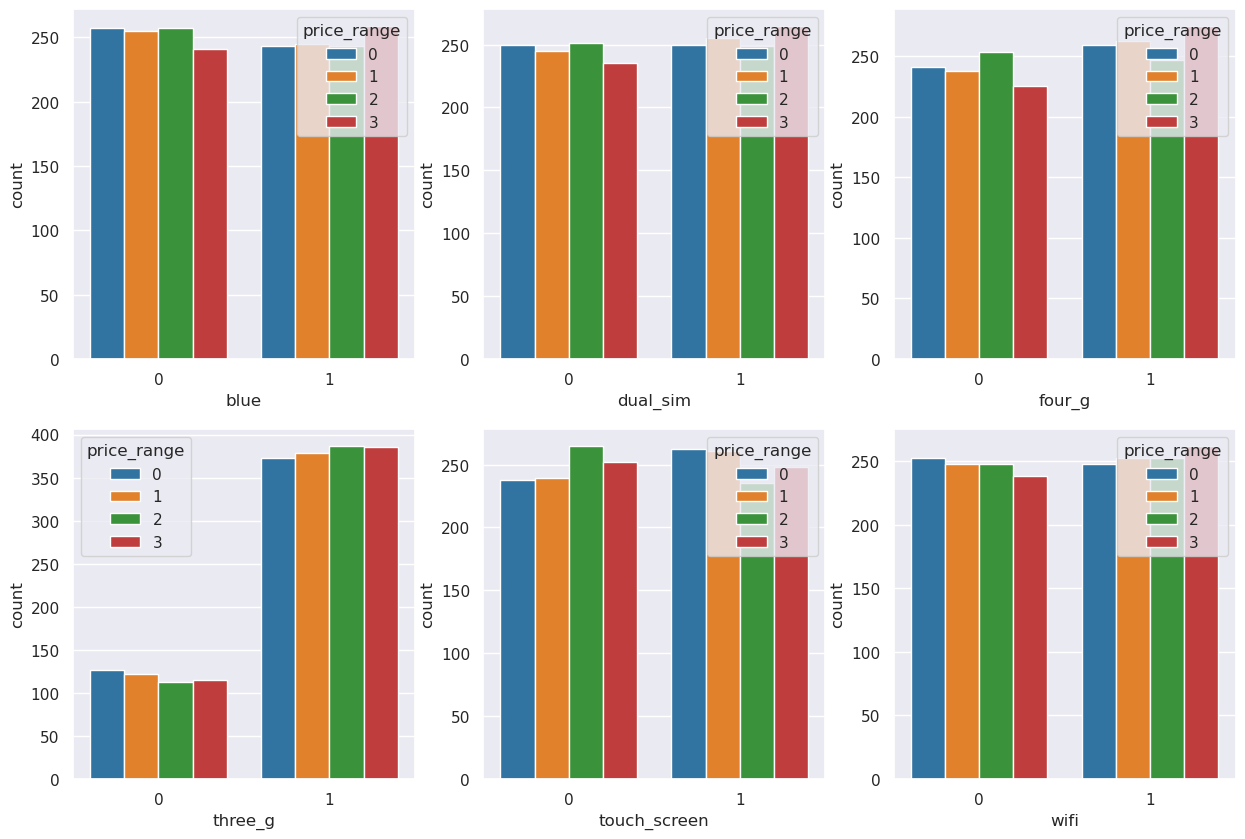

In [10]:
cat_var = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
fig, axes = plt.subplots(2, 3, figsize=(15,10))

for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(x=cat, data=df, hue="price_range", ax=ax, palette='tab10')

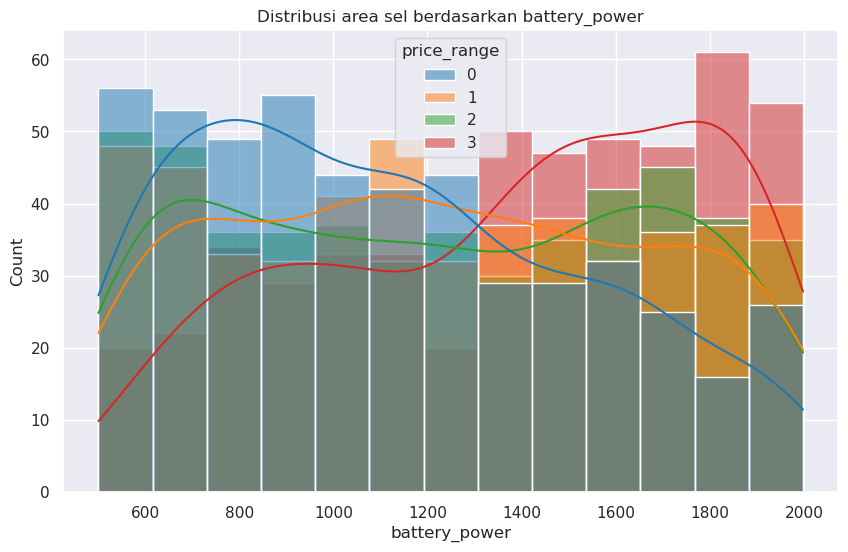

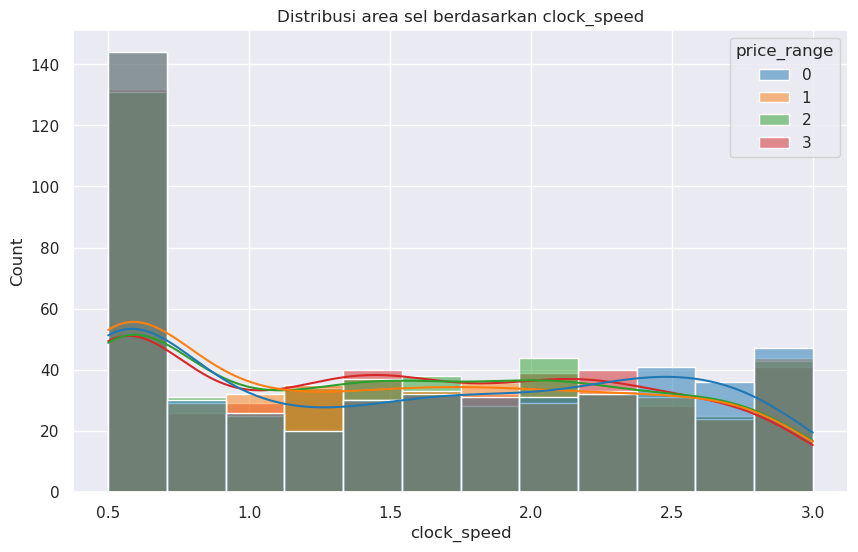

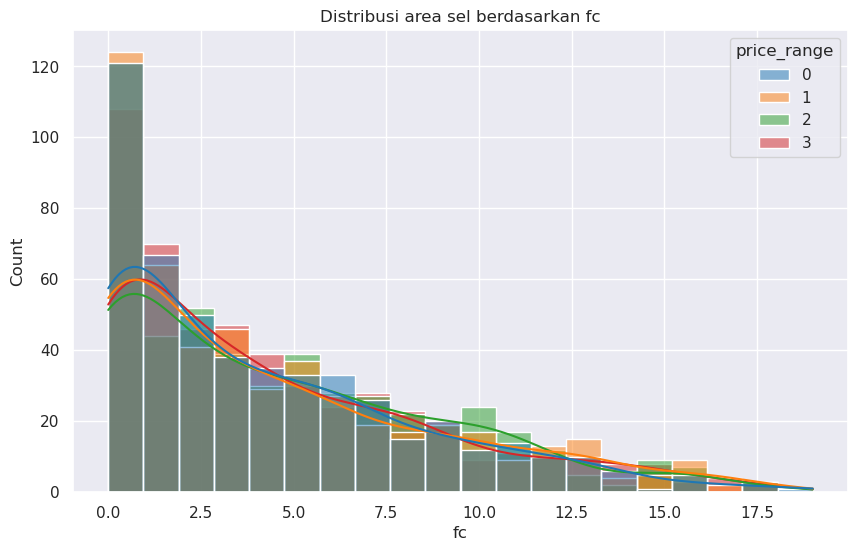

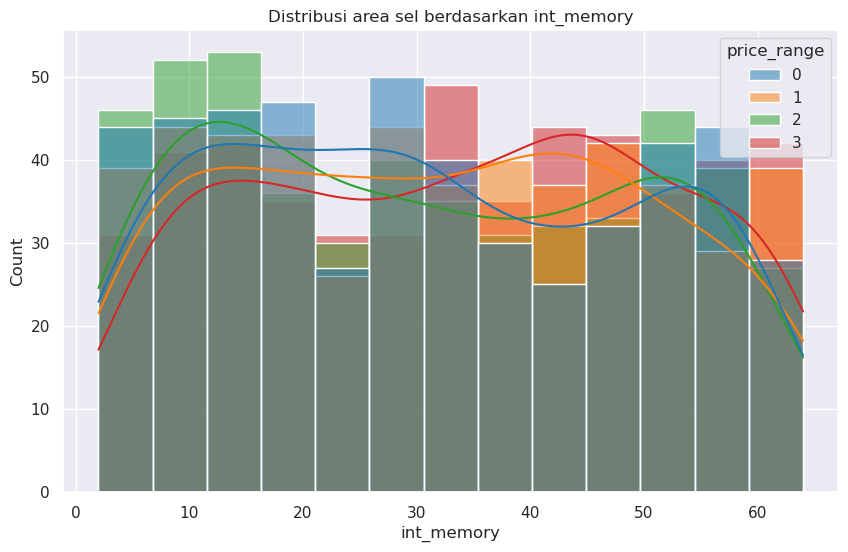

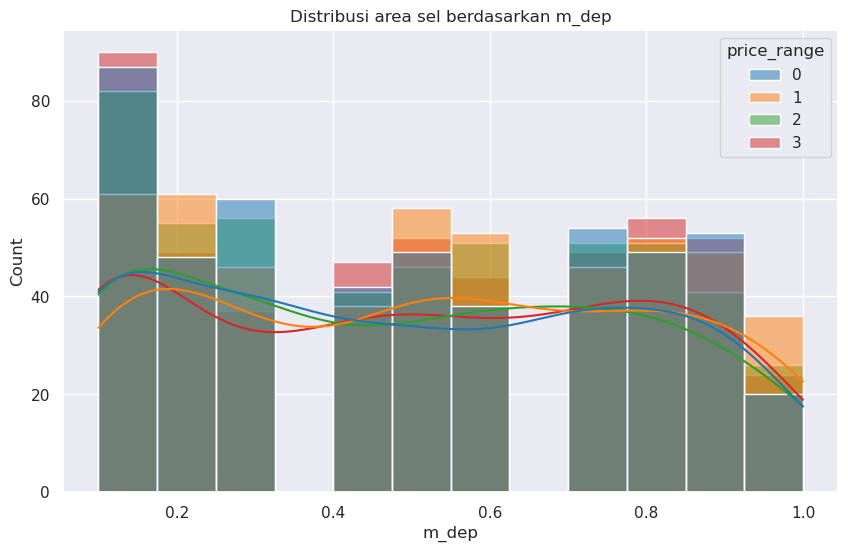

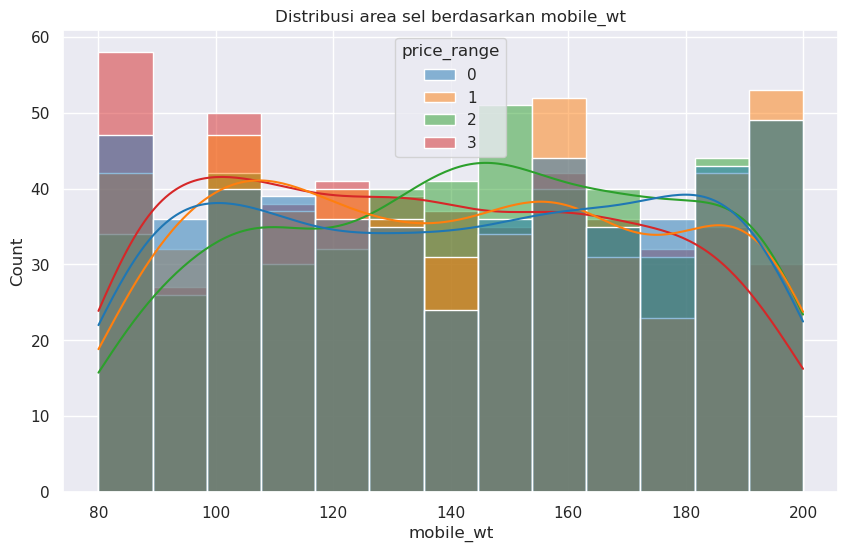

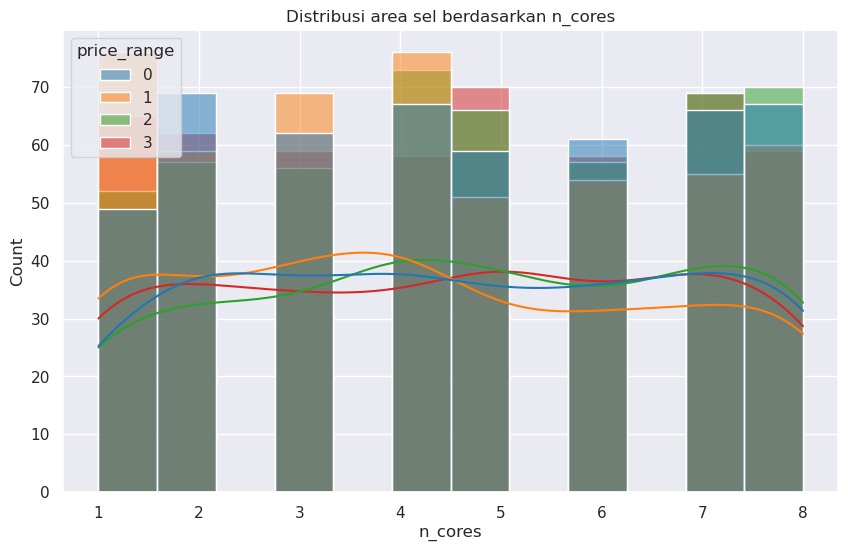

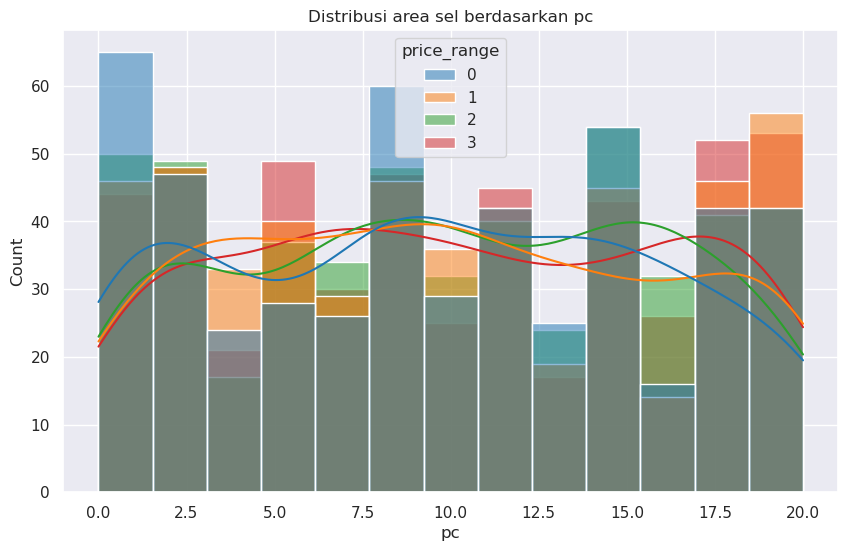

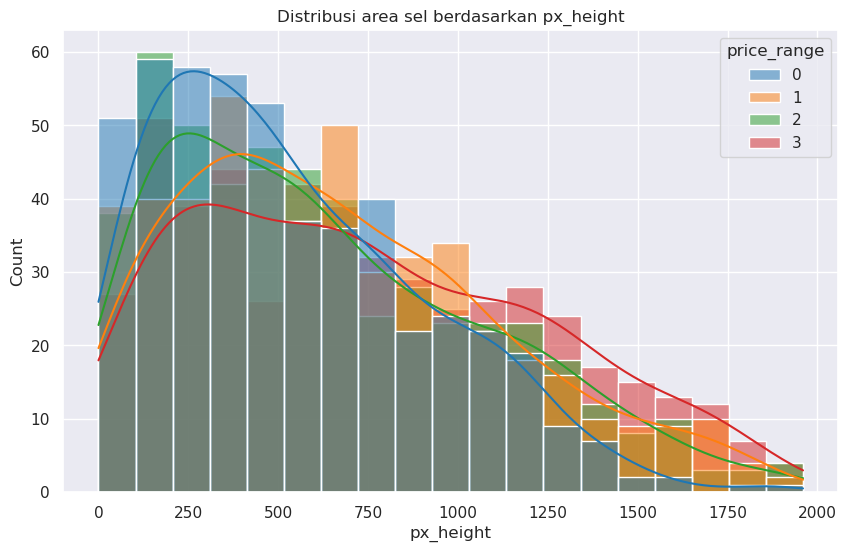

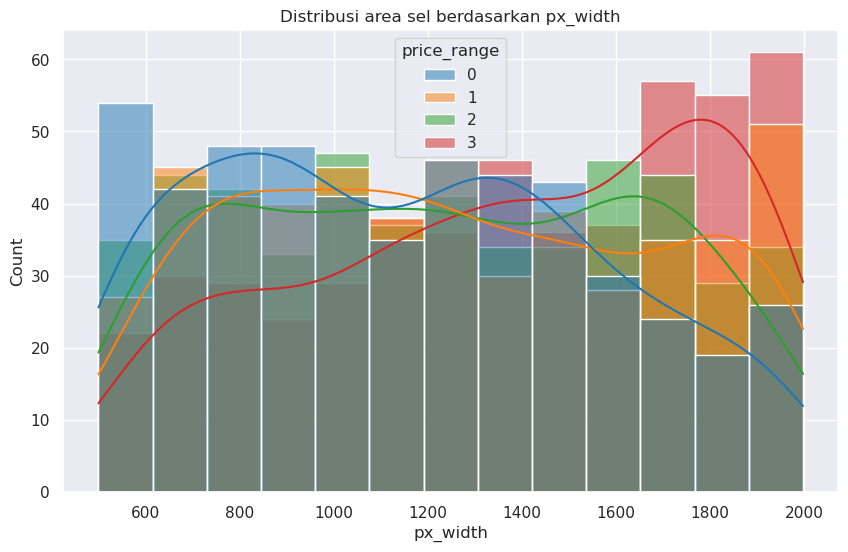

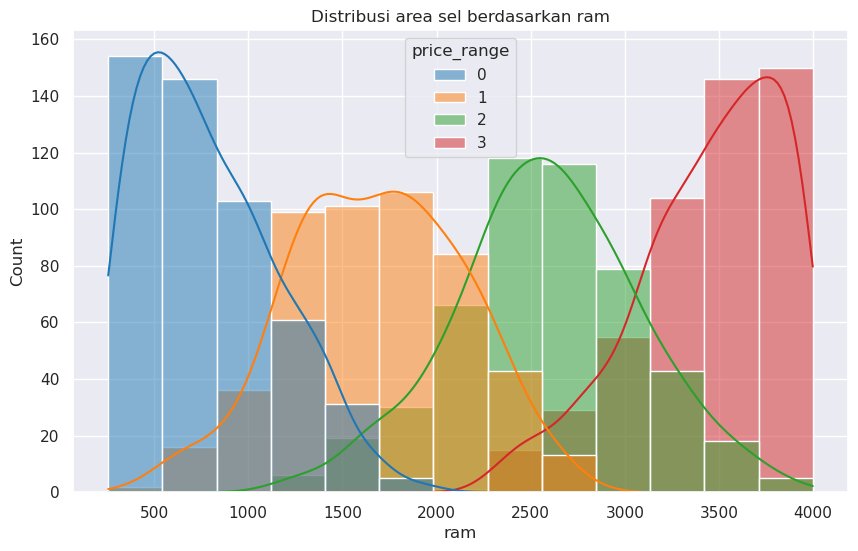

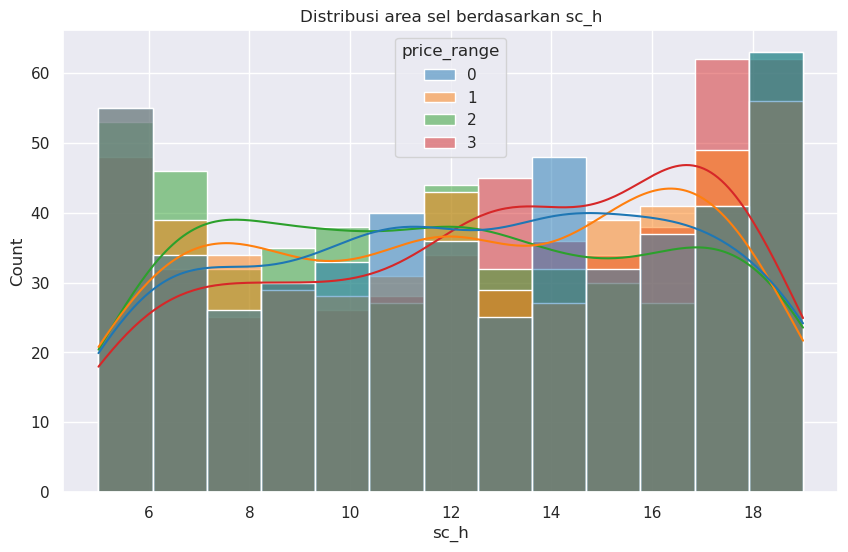

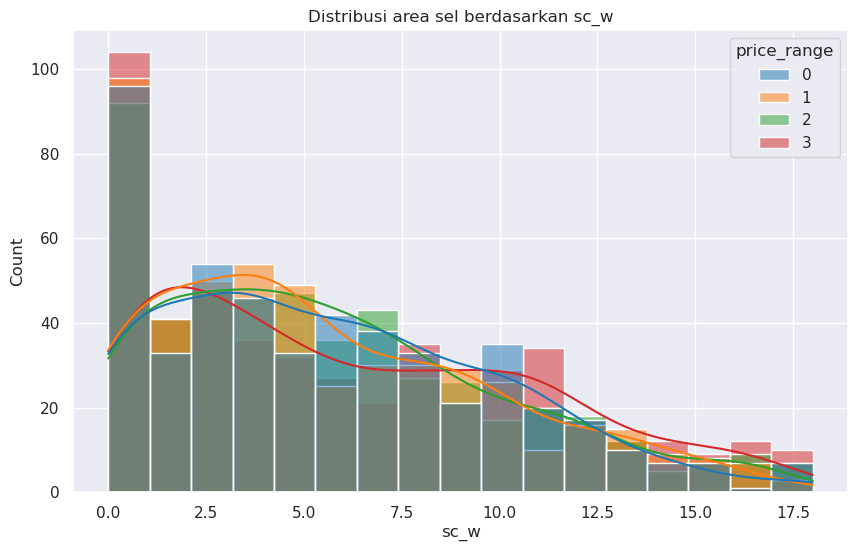

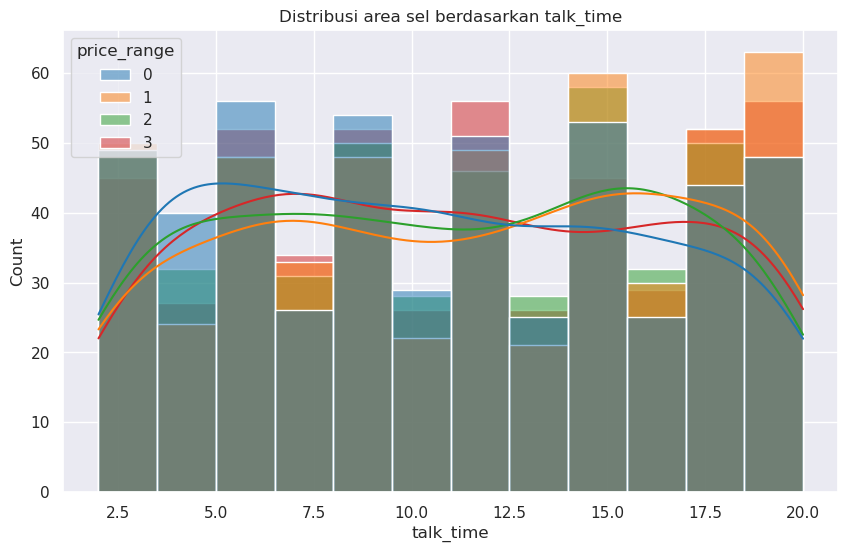

In [11]:
num_columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
for col in num_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=col, hue="price_range", kde=True, palette='tab10')
    plt.title(f"Distribusi area sel berdasarkan {col}")
    plt.show()

In [12]:
df.duplicated().sum()

0

### Seleksi Fitur

In [13]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [14]:
df = df[['battery_power', 'px_height','px_width', 'ram', 'price_range']]

# Modeling

### Dataset Spliting

In [15]:
X = df.drop(columns="price_range")
y = df.price_range

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 4), (400, 4), (1600,), (400,))

# Training

In [16]:
rsp.svm_poly_params

{'prep__numeric__poly__degree': Integer(low=1, high=3),
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__gamma': Real(low=-3, high=3, prior='log-uniform'),
 'algo__C': Real(low=-3, high=3, prior='log-uniform')}

In [22]:
preprocessor = ColumnTransformer([
    ("numeric", num_pipe(impute="median", poly=2, scaling='standard'), X_train.columns)
])
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", SVC(max_iter=500))
])

model = RandomizedSearchCV(pipeline, rsp.svm_poly_params, n_iter=50, cv=3,n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/home/zaens/miniconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/zaens/miniconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/zaens/miniconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/zaens/miniconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/za

{'algo__C': 21.398194315034452, 'algo__gamma': 0.026056106369619126, 'prep__numeric__poly__degree': 2, 'prep__numeric__poly__interaction_only': True}
0.959375 0.9456284709778817 0.9675


/home/zaens/miniconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/zaens/miniconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/zaens/miniconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/zaens/miniconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/za

# Save Model

In [18]:
save_model(model, "mobile_classifier.pkl")

Model is pickled as model/mobile_classifier.pkl


In [25]:
preds = model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y_test, preds)

array([[100,   0,   0,   0],
       [  0,  97,   3,   0],
       [  0,   3,  93,   4],
       [  0,   0,   3,  97]])

In [28]:
from jcopml.plot import plot_confusion_matrix

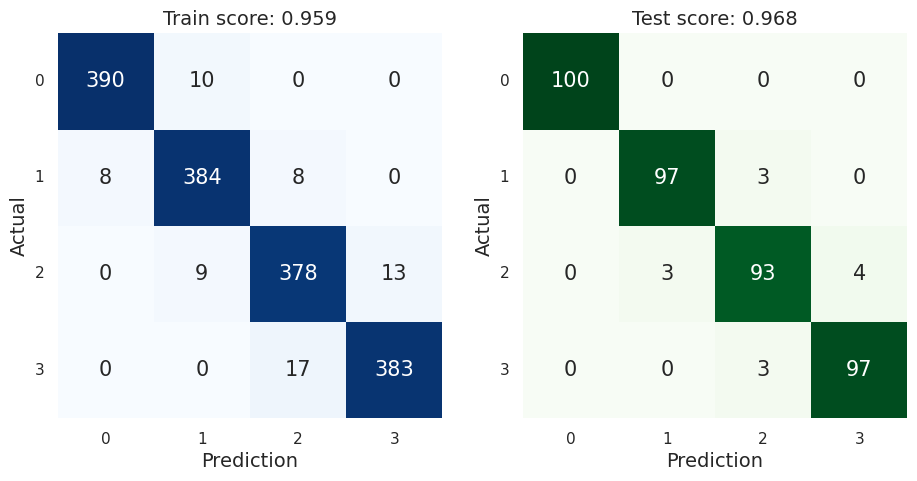

In [30]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)